In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv("C:/Users/dell/Downloads/customer_churn.csv")
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


insights
1. there is no nan values
2. all columns data type is ok but stizens data type is rong
3. many columns are int formate of yes and no
4. customer id column is us less 
5. total charges in object data ttype with missing values ' '

In [5]:
df.drop(columns='customerID',inplace=True)
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','0').astype(float)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3032,Male,0,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,369.05,No
5823,Female,0,No,No,22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,470.20,No
5119,Female,0,No,No,5,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,75.65,399.45,No
3674,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.80,45.80,Yes
286,Female,0,No,No,20,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.35,927.15,No


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [29]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Churn Dataset Report", explorative=True)
profile.to_file("churn_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 21.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:

cat_columns= df.select_dtypes(include=['object'])
print(cat_columns.shape)
num_columns= df.drop(columns=cat_columns)
num_columns_p=num_columns.drop(columns=['SeniorCitizen']).columns
cat_columns_p=cat_columns.drop(columns=['Contract']).columns
print(num_columns_p)
print(cat_columns_p)



(7043, 16)
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')


analisis to num columns

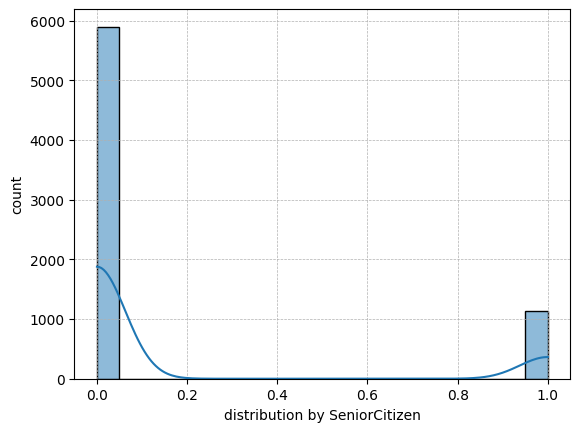

******************************************************************************************
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
******************************************************************************************


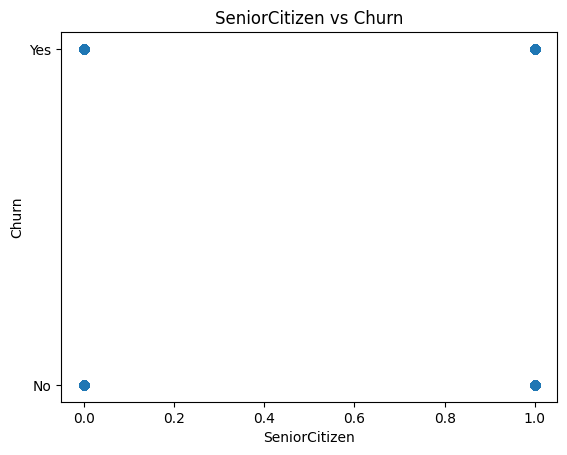

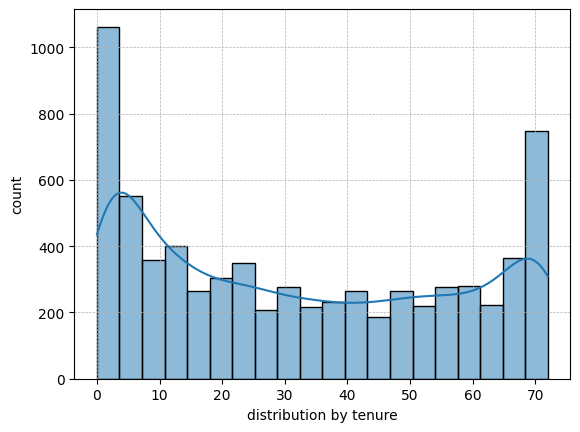

******************************************************************************************
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
******************************************************************************************


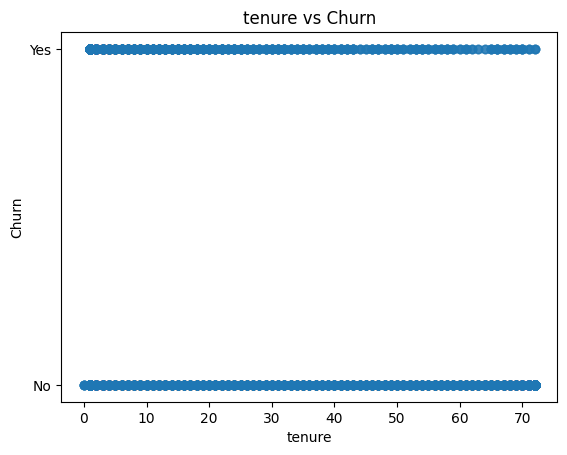

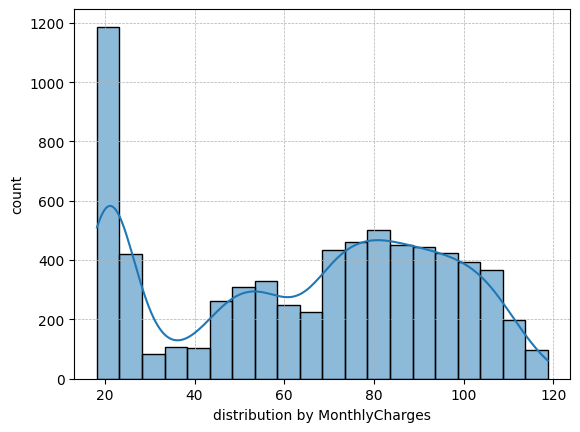

******************************************************************************************
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
******************************************************************************************


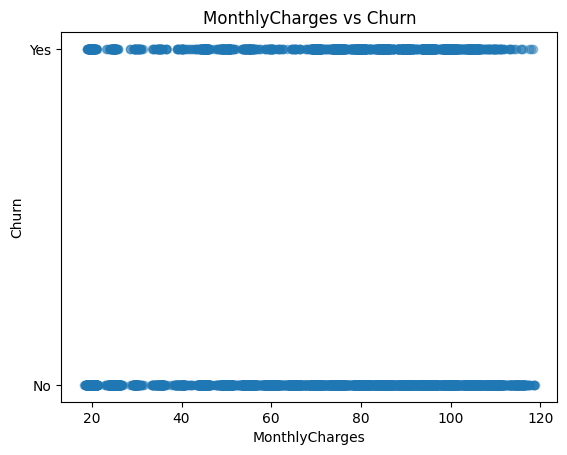

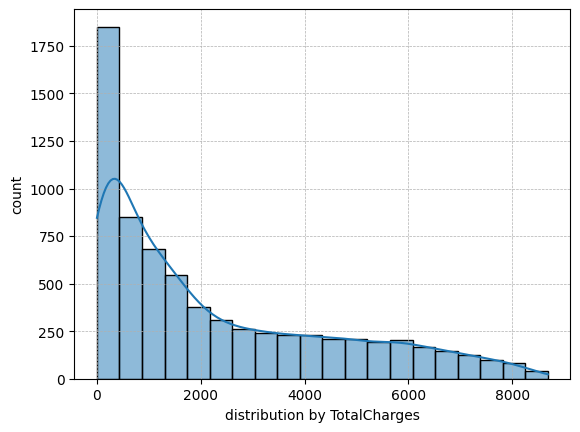

******************************************************************************************
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
******************************************************************************************


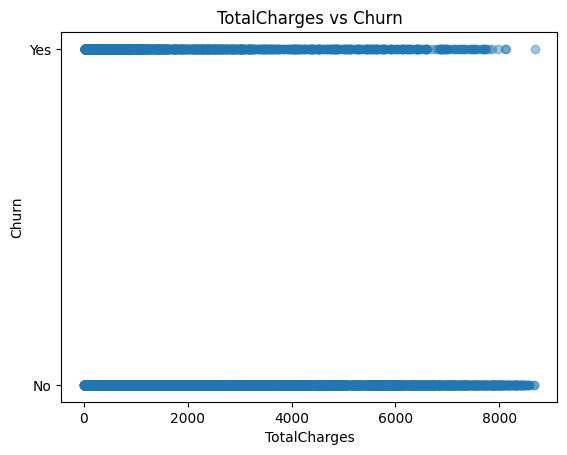

In [ ]:

# def linear_num(column_data,column_name):
#     plt.scatter(column_data, df['Churn'], alpha=0.4)
#     plt.xlabel(f'{column_name}')
#     plt.ylabel('Churn')
#     plt.title(f'{column_name} vs Churn')
#     plt.show()




def hist_num(column_data,column_name):
    sns.histplot(column_data,kde=True,bins=20)
    plt.grid(True, linestyle='--',linewidth=0.5)
    plt.xlabel(f'distribution by {column_name}')
    plt.ylabel('count')
    plt.show()
    
    print('*'*90)
    print(column_data.describe())
    print('*'*90)
for col in num_columns:
    hist_num(df[col],col)
    

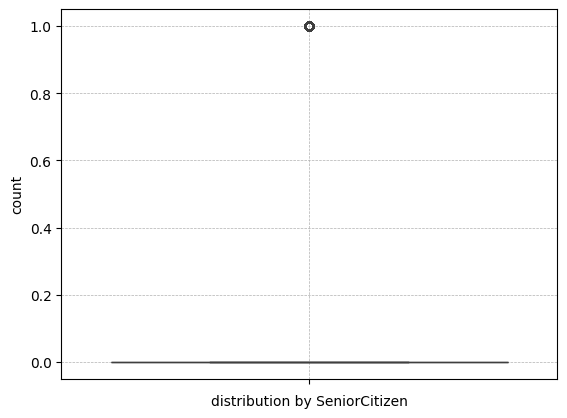

******************************************************************************************
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
******************************************************************************************


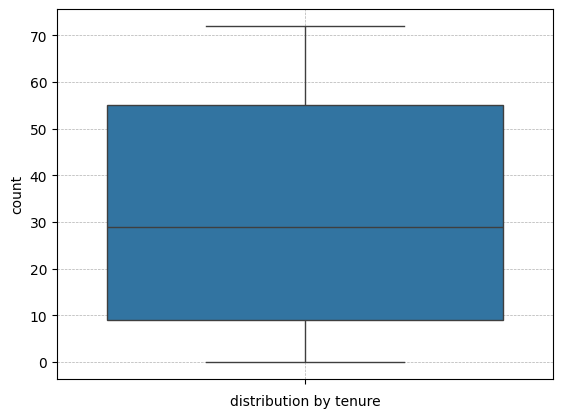

******************************************************************************************
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
******************************************************************************************


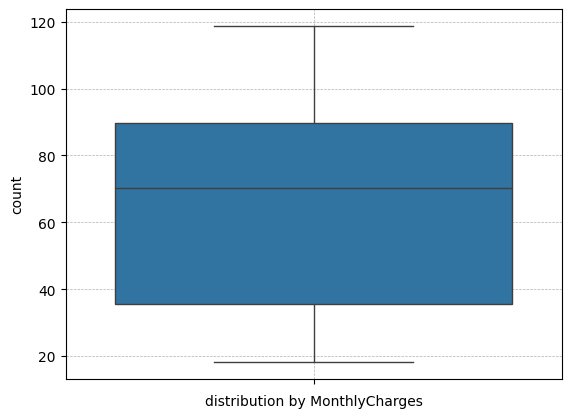

******************************************************************************************
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
******************************************************************************************


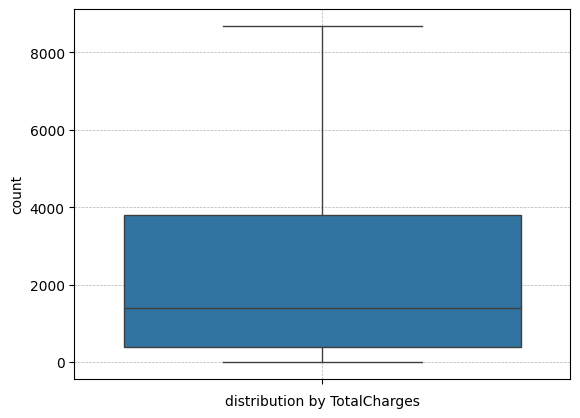

******************************************************************************************
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
******************************************************************************************


In [8]:
def hist_num(column_data,column_name):
    sns.boxplot(column_data)
    plt.grid(True, linestyle='--',linewidth=0.5)
    plt.xlabel(f'distribution by {column_name}')
    plt.ylabel('count')
    plt.show()
    
    print('*'*90)
    print(column_data.describe())
    print('*'*90)
for col in num_columns:
    hist_num(df[col],col)

insights
1. numerical data is skewed
2. no outliers

analisis of catagorical columns

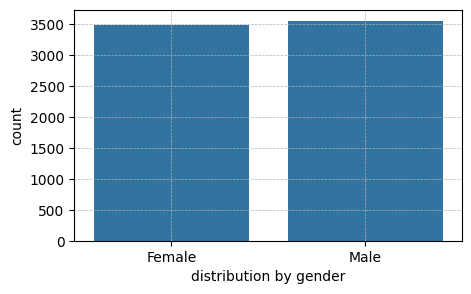

******************************************************************************************
count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
******************************************************************************************


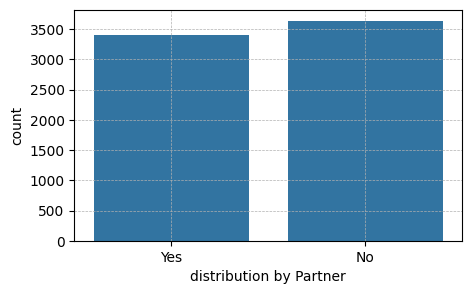

******************************************************************************************
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
******************************************************************************************


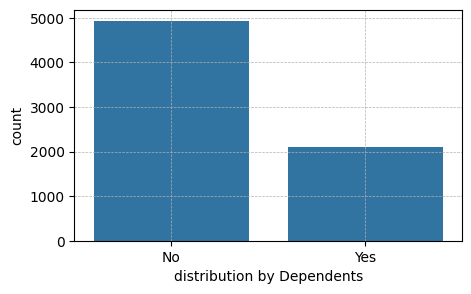

******************************************************************************************
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
******************************************************************************************


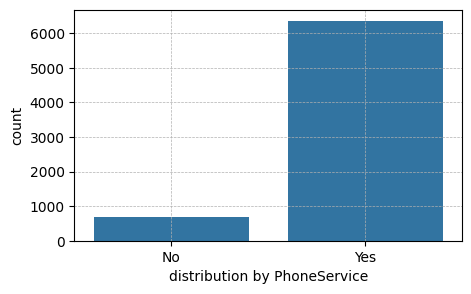

******************************************************************************************
count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object
******************************************************************************************


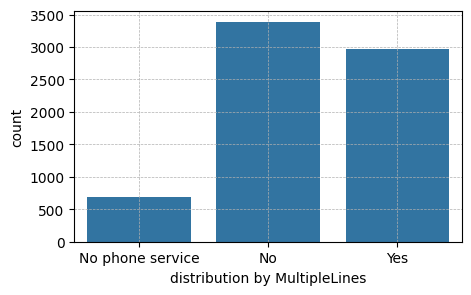

******************************************************************************************
count     7043
unique       3
top         No
freq      3390
Name: MultipleLines, dtype: object
******************************************************************************************


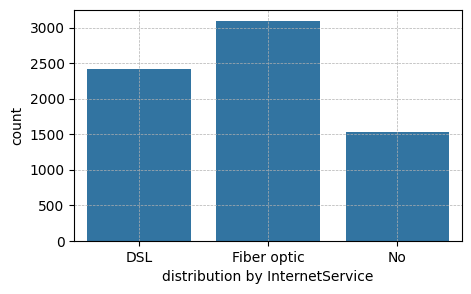

******************************************************************************************
count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object
******************************************************************************************


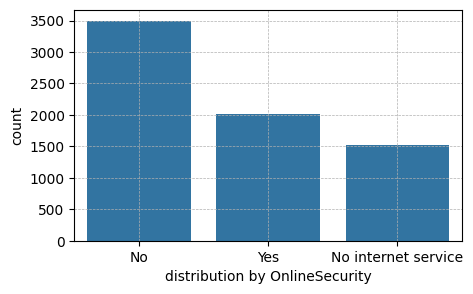

******************************************************************************************
count     7043
unique       3
top         No
freq      3498
Name: OnlineSecurity, dtype: object
******************************************************************************************


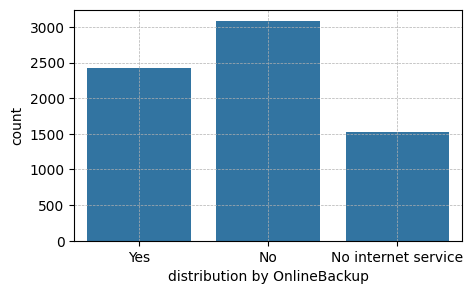

******************************************************************************************
count     7043
unique       3
top         No
freq      3088
Name: OnlineBackup, dtype: object
******************************************************************************************


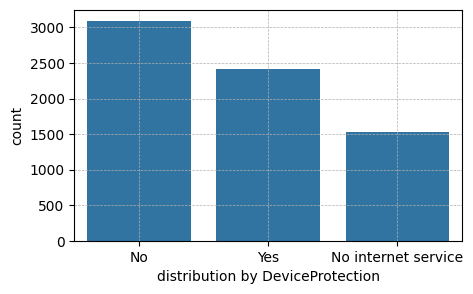

******************************************************************************************
count     7043
unique       3
top         No
freq      3095
Name: DeviceProtection, dtype: object
******************************************************************************************


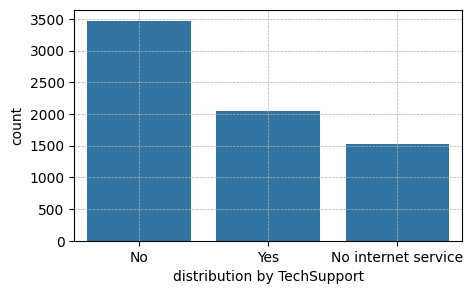

******************************************************************************************
count     7043
unique       3
top         No
freq      3473
Name: TechSupport, dtype: object
******************************************************************************************


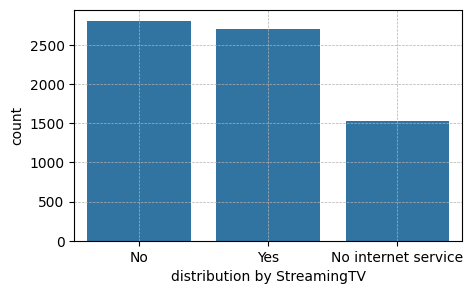

******************************************************************************************
count     7043
unique       3
top         No
freq      2810
Name: StreamingTV, dtype: object
******************************************************************************************


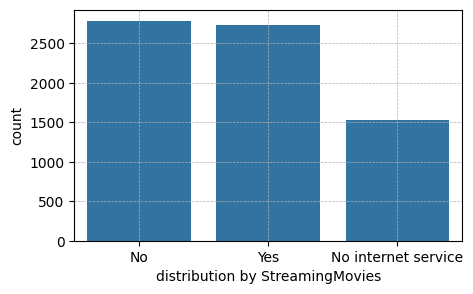

******************************************************************************************
count     7043
unique       3
top         No
freq      2785
Name: StreamingMovies, dtype: object
******************************************************************************************


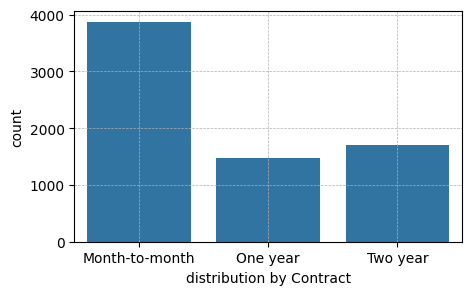

******************************************************************************************
count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object
******************************************************************************************


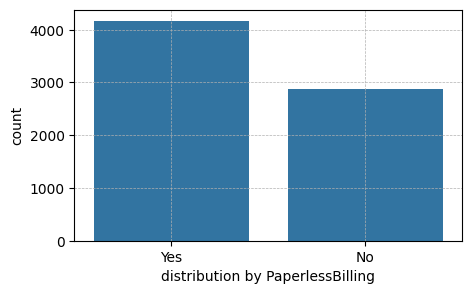

******************************************************************************************
count     7043
unique       2
top        Yes
freq      4171
Name: PaperlessBilling, dtype: object
******************************************************************************************


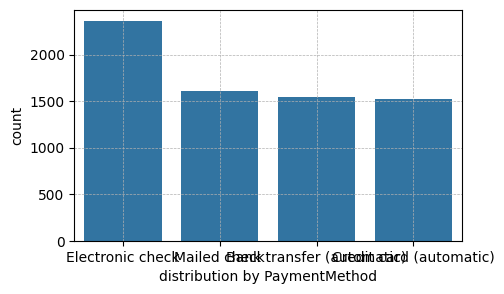

******************************************************************************************
count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object
******************************************************************************************


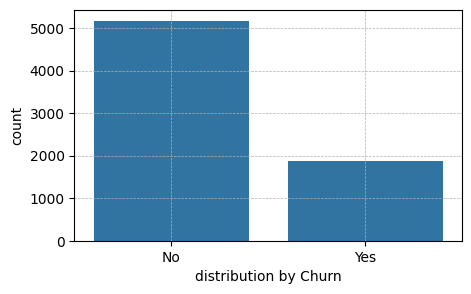

******************************************************************************************
count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object
******************************************************************************************


In [9]:
def hist_num(column_data,column_name):
    plt.figure(figsize=(5,3))
    sns.countplot(x=column_data)
    plt.grid(True, linestyle='--',linewidth=0.5)
    plt.xlabel(f'distribution by {column_name}')
    plt.ylabel('count')
    plt.show()
    
    print('*'*90)
    print(column_data.describe())
    print('*'*90)
for col in cat_columns:
    hist_num(df[col],col)

1. maximum customers are happy with paperless billing
2. month to moth is most frequent plan


In [10]:
for col in cat_columns:
    print(f'{col} =>  {df[col].unique()}')
    print('#'*30)

gender =>  ['Female' 'Male']
##############################
Partner =>  ['Yes' 'No']
##############################
Dependents =>  ['No' 'Yes']
##############################
PhoneService =>  ['No' 'Yes']
##############################
MultipleLines =>  ['No phone service' 'No' 'Yes']
##############################
InternetService =>  ['DSL' 'Fiber optic' 'No']
##############################
OnlineSecurity =>  ['No' 'Yes' 'No internet service']
##############################
OnlineBackup =>  ['Yes' 'No' 'No internet service']
##############################
DeviceProtection =>  ['No' 'Yes' 'No internet service']
##############################
TechSupport =>  ['No' 'Yes' 'No internet service']
##############################
StreamingTV =>  ['No' 'Yes' 'No internet service']
##############################
StreamingMovies =>  ['No' 'Yes' 'No internet service']
##############################
Contract =>  ['Month-to-month' 'One year' 'Two year']
##############################
PaperlessBillin

In [11]:
yn_col=[]
for col in cat_columns:
    if df[col].nunique()==2:
        yn_col.append(col)

mult_col=cat_columns.drop(columns=yn_col)
yn_col=df[yn_col]
print(yn_col.nunique())
print('*'*20)
print(mult_col.nunique())


gender              2
Partner             2
Dependents          2
PhoneService        2
PaperlessBilling    2
Churn               2
dtype: int64
********************
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaymentMethod       4
dtype: int64


In [12]:
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
x=df.drop(columns=['Churn'])
y=df['Churn'].apply( lambda x : 1 if x=='Yes' else 0)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [16]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:

or_catagory=[['Month-to-month','One year' ,'Two year']]
num_pipe= Pipeline(steps=[
    ('scale',StandardScaler()
    )])
list_numcol=['tenure',  'MonthlyCharges','MonthlyCharges',]
list_catcol=['gender','Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
lable_pipe=Pipeline(
    steps=[('label',OrdinalEncoder(categories=or_catagory))
    ])
cat_pipe=Pipeline(
    steps=[
        ('encode',OneHotEncoder(drop='first',sparse_output=False)),])


process=ColumnTransformer(
    transformers=[
        ('num',num_pipe,list_numcol),
        ('lab', lable_pipe,['Contract']),
        ('cat',cat_pipe,list_catcol)
        
    ])


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import VotingClassifier
from collections import Counter
from xgboost import XGBClassifier


x_train_processed = process.fit_transform(x_train)

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_processed, y_train)




counter = Counter(y_train_res)
ratio = counter[0] / counter[1]  
model_xgboost = XGBClassifier(scale_pos_weight=ratio)#
model_rf=  RandomForestClassifier(class_weight="balanced")
model_svm=SVC(class_weight="balanced")


from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rf', model_rf), ('xg', model_xgboost), ('svc', model_svm)],
    voting='hard')  




model = Pipeline(steps=[
    ("classifier",voting_clf)
])
scores = cross_val_score(voting_clf ,x_train_res, y_train_res, cv=10, scoring='accuracy')

print("Har fold ka accuracy:", scores)
print("Average accuracy:", scores.mean())


model.fit(x_train_res, y_train_res)
y_pred = model.predict(process.transform(x_test))  


print(classification_report(y_test, y_pred))
# random forest 78
# xg boost      79
#svm            76
#knn            71

Har fold ka accuracy: [0.79951691 0.75845411 0.76449275 0.8321256  0.88405797 0.90700483
 0.89963724 0.8923821  0.90205562 0.91051995]
Average accuracy: 0.8550247095315703
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1036
           1       0.60      0.67      0.63       373

    accuracy                           0.79      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.80      0.79      0.80      1409

